### 2026.11.16

### 이진분류 문제 해결

In [27]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
n_redundant=5, random_state=42)

In [16]:
# 데이터 분할: 훈련, 검증, 테스트 데이터셋
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3,
random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
test_size=0.5, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [18]:
# layer 구성
model = Sequential([
    Input(shape = (X_train.shape[1],)), # 입력층
    Dense(64, activation='relu'), # 은닉층
    #과적합 방지
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [22]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [ ]:
history = model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5071 - loss: 0.7217 - val_accuracy: 0.6267 - val_loss: 0.6600
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6614 - loss: 0.6196 - val_accuracy: 0.8067 - val_loss: 0.5482
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7257 - loss: 0.5523 - val_accuracy: 0.8800 - val_loss: 0.4627
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7671 - loss: 0.4896 - val_accuracy: 0.9000 - val_loss: 0.3912
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8214 - loss: 0.4479 - val_accuracy: 0.8933 - val_loss: 0.3306
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.4131 - val_accuracy: 0.9000 - val_loss: 0.2906
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8357 - loss: 0.3705 - val_accuracy: 0.9067 - val_loss: 0.2635
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8586 - loss: 0.3524 - val_accuracy: 0.9133 - val_loss

In [24]:
# 6. 모델 평가
# 테스트 데이터로 성능 평가

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9267 - loss: 0.1577 
Test Loss: 0.1577, Test Accuracy: 0.9267


In [25]:
# 7. 예측
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int) # 0.5를 기준으로 클래스 결정

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [28]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        79
           1       0.93      0.92      0.92        71

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



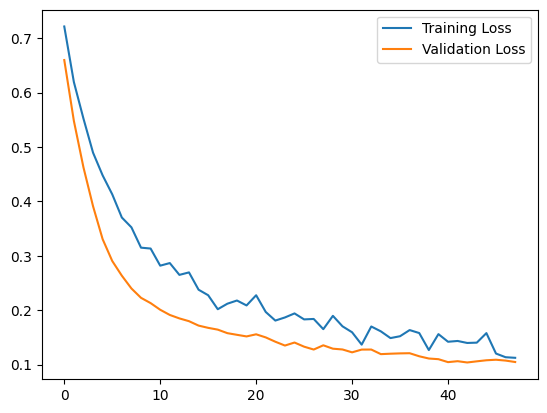

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.legend()

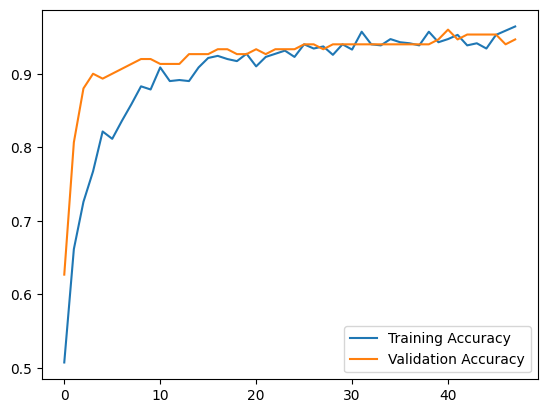

In [36]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()

### 다중 분류

In [37]:
from tensorflow.keras.models import Sequential # 순차적 모델 생성
from tensorflow.keras.layers import Dense # 완전 연결(Dense) 층
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩
from tensorflow.keras.datasets import mnist # MNIST 데이터셋 가져오기

In [38]:
# MNIST 데이터셋을 훈련 세트와 테스트 세트로 분리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [42]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [ ]:
# 입력 데이터(이미지)를 1차원 벡터로 변환하고 정규화 (0~1 범위로 스케일링)
x_train = x_train.reshape(-1, 784) / 255.0 # 28x28 이미지를 784 길이의 벡터로 변환
x_test = x_test.reshape(-1, 784) / 255.0

# 255 → 픽셀 데이터 타입의 최대값
# 0~1 범위로 정규화


In [43]:
# 레이블(출력 값)을 원-핫 인코딩 (예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [44]:
model = Sequential([
# 첫 번째 은닉층: 뉴런 128개, 활성화 함수 ReLU, 입력 크기는 784
Dense(128, activation='relu', input_shape=(784,)),
# 두 번째 은닉층: 뉴런 64개, 활성화 함수 ReLU
Dense(64, activation='relu'),
# 출력층: 뉴런 10개 (클래스 수), 활성화 함수 Softmax
Dense(10, activation='softmax')
])

c:\py_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9217 - loss: 0.2684 - val_accuracy: 0.9578 - val_loss: 0.1368
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.1105 - val_accuracy: 0.9688 - val_loss: 0.1040
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9773 - loss: 0.0739 - val_accuracy: 0.9684 - val_loss: 0.0996
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0560 - val_accuracy: 0.9745 - val_loss: 0.0855
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0463 - val_accuracy: 0.9735 - val_loss: 0.0977
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9705 - val_loss: 0.1117
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9893 - loss: 0.0315 - val_accuracy: 0.9747 - val_loss: 0.0938
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0254 - 

In [47]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.1065
테스트 정확도: 0.9739000201225281


In [48]:
predictions = model.predict(x_test[:1])
print(f"Softmax 출력: {predictions[0]}") # 각 클래스에 대한 확률 값
print(f"예측 클래스: {predictions.argmax()}") # 확률이 가장 높은 클래스

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Softmax 출력: [2.7002133e-11 4.6779856e-09 2.8412801e-08 3.0599310e-06 1.4911713e-18
 3.8049494e-11 1.2139076e-15 9.9999678e-01 6.1027123e-08 2.2537980e-08]
예측 클래스: 7
